# Exploratory Data Analysis

This notebook introduces you to exploratory data analysis using the [pandas](https://pandas.pydata.org) library. Pandas is not specific to geospatial data, so what we do here can be applied to pretty much any dataset you encounter.

![pandas logo](https://pandas.pydata.org/pandas-docs/stable/_static/pandas.svg)

As a quick intro, we reommend [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html). This notebook will point you to the relevant sections of the [pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html), which is generally a great resource whenever you need documentation about a pandas feature.

Let's get started by loading pandas:

In [136]:
import pandas as pd

### Loading data

Load some traffic accident data directly from the web ([NYC Crash Mapper](http://crashmapper.org/#/?cfat=true&cinj=true&endDate=2019-03&geo=citywide&identifier=&lngLats=%255B%255D&mfat=true&minj=true&noInjFat=false&pfat=true&pinj=true&startDate=2018-03)):

In [137]:
url="https://chekpeds.carto.com/api/v2/sql?q=SELECT%20c.cartodb_id%2C%20c.socrata_id%2C%20c.the_geom%2C%20c.on_street_name%2C%20c.cross_street_name%2C%20c.date_val%20AS%20date_time%2C%20c.latitude%2C%20c.longitude%2C%20c.borough%2C%20c.zip_code%2C%20c.crash_count%2C%20c.number_of_cyclist_injured%2C%20c.number_of_cyclist_killed%2C%20c.number_of_motorist_injured%2C%20c.number_of_motorist_killed%2C%20c.number_of_pedestrian_injured%2C%20c.number_of_pedestrian_killed%2C%20c.number_of_persons_injured%2C%20c.number_of_persons_killed%2C%20array_to_string(c.contributing_factor%2C%20%27%2C%27)%20as%20contributing_factors%2C%20array_to_string(c.vehicle_type%2C%20%27%2C%27)%20as%20vehicle_types%20FROM%20crashes_all_prod%20c%20%20WHERE%20(%20year%3A%3Atext%20%7C%7C%20LPAD(month%3A%3Atext%2C%202%2C%20%270%27)%20%3C%3D%20%272019%27%20%7C%7C%20LPAD(3%3A%3Atext%2C%202%2C%20%270%27)%20)%20AND%20(%20year%3A%3Atext%20%7C%7C%20LPAD(month%3A%3Atext%2C%202%2C%20%270%27)%20%3E%3D%20%272018%27%20%7C%7C%20LPAD(3%3A%3Atext%2C%202%2C%20%270%27)%20)%20%20AND%20(%20number_of_cyclist_injured%20%3E%200%20OR%20number_of_motorist_injured%20%3E%200%20OR%20number_of_pedestrian_injured%20%3E%200%20%20OR%20%20number_of_cyclist_killed%20%3E%200%20OR%20number_of_motorist_killed%20%3E%200%20OR%20number_of_pedestrian_killed%20%3E%200%20)&format=CSV"
accidents = pd.read_csv(url)

This creates a [dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), let's take a glimpse:

In [138]:
accidents

,the_geom,cartodb_id,socrata_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
0,0101000020E61000001092054CE07E52C09FAD8383BD55...,2413283,4069947,6 AVENUE,NaN,2019-01-27 18:15:00+00,40.669846,-73.982440,Brooklyn,11215.0,...,1,0,0,0,0,0,1,0,Unspecified,Bike
1,0101000020E61000004B766C04E27752C08505F7031E60...,2470114,4079675,37 AVENUE,NaN,2019-02-12 13:10:00+00,40.750916,-73.873170,Queens,11372.0,...,0,0,1,0,0,0,1,0,"Pavement Slippery,Driver Inattention/Distraction","Sedan,Sedan"
2,NaN,2435640,4052363,MANHATTAN BR LOWER,NaN,2018-12-17 07:43:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,Driver Inattention/Distraction,Sedan
3,NaN,2414624,4068529,HUTCHINSON RIVER PARKWAY,NaN,2019-01-24 17:00:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Sedan"
4,0101000020E61000006F0D6C95607B52C0ADFBC742746E...,2249708,3860813,ARDEN STREET,NaN,2018-03-10 03:40:00+00,40.862923,-73.927770,Manhattan,10040.0,...,0,0,0,0,1,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49150,0101000020E6100000C85EEFFE786D52C08466D7BD155D...,2369949,4008634,JAMAICA AVENUE,NaN,2018-10-27 18:20:00+00,40.727226,-73.710510,Queens,11001.0,...,0,0,0,0,1,0,1,0,Unspecified,Station Wagon/Sport Utility Vehicle
49151,0101000020E6100000C85EEFFE786D52C08466D7BD155D...,2269312,3880302,LITTLE NECK PARKWAY,NaN,2018-04-12 08:00:00+00,40.727226,-73.710510,Queens,11001.0,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified,Uns...","PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTIL..."
49152,0101000020E610000054707841446E52C08333F8FBC55C...,2317295,3926993,jericho turnpike,NaN,2018-06-17 16:30:00+00,40.724792,-73.722916,Queens,NaN,...,0,0,2,0,0,0,2,0,"Unspecified,Unspecified","Pick-up Truck,Sedan"
49153,0101000020E6100000C85EEFFE786D52C08466D7BD155D...,2463395,4077377,JERICHO TURNPIKE,NaN,2019-02-06 21:25:00+00,40.727226,-73.710510,Queens,11001.0,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan


Loading a local file is just as easy:

In [139]:
accidents = pd.read_csv("Data/accidents.csv") # <- this is actually an older version of the same dataset we loaded from the web before
accidents

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
0,NaN,1,2456713,CLINTON B FRISK,NaN,2019-01-28 08:07:00+00,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
1,NaN,1,2456758,HILLSIDE AVENUE,NaN,2019-01-28 15:57:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2,0101000020E6100000E9D495CFF27652C0ABE7A4F78D5B...,1,2456770,YELLOWSTONE BOULEVARD,NaN,2019-01-28 19:00:00+00,40.715270,-73.858570,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
3,NaN,1,2456794,GUY R BREWER BOULEVARD,NaN,2019-01-28 06:45:00+00,NaN,NaN,NaN,11434.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
4,0101000020E610000078D15790667452C0ACE3F8A1D264...,1,2456795,147 STREET,NaN,2019-01-28 17:48:00+00,40.787678,-73.818760,Queens,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48831,0101000020E61000006EC0E787118A52C07500C45DBD4E...,1,2454700,STATEN ISLAND EXPRESSWAY,NaN,2018-12-09 23:27:00+00,40.615154,-74.157320,Staten Island,NaN,...,0,0,15,0,0,0,15,0,"Unsafe Speed,Unspecified,Unspecified,Unspecified","Fire,Sedan,Station Wagon/Sport Utility Vehicle..."
48832,0101000020E610000054E3A59BC47652C090F7AA95095B...,1,2455580,METROPOLITAN AVENUE,NaN,2018-12-08 11:40:00+00,40.711230,-73.855750,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
48833,0101000020E610000044A7E7DD588052C08E0244C18C5B...,1,2455630,BROADWAY,NaN,2018-12-07 00:07:00+00,40.715233,-74.005424,Manhattan,10278.0,...,0,0,4,0,0,0,4,0,"Driver Inattention/Distraction,Driver Inattent...","Taxi,Taxi,Taxi"
48834,0101000020E61000001A51DA1B7C7352C02EC55565DF59...,1,2455740,150 STREET,NaN,2018-12-07 03:10:00+00,40.702130,-73.804450,Queens,11435.0,...,0,0,3,0,0,0,3,0,"Driver Inattention/Distraction,Driver Inattent...","Station Wagon/Sport Utility Vehicle,Bus"


Let's check out the [data types](https://pbpython.com/pandas_dtypes.html) on our accidents data

In [140]:
accidents.dtypes

the_geom                         object
crash_count                       int64
cartodb_id                        int64
on_street_name                   object
cross_street_name                object
date_time                        object
latitude                        float64
longitude                       float64
borough                          object
zip_code                        float64
socrata_id                        int64
number_of_cyclist_injured         int64
number_of_cyclist_killed          int64
number_of_motorist_injured        int64
number_of_motorist_killed         int64
number_of_pedestrian_injured      int64
number_of_pedestrian_killed       int64
number_of_persons_injured         int64
number_of_persons_killed          int64
contributing_factors             object
vehicle_types                    object
dtype: object

Strings and the timestamp are stored as [objects](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=object) – we'll fix that in a bit.

Let's try to access parts of the accidents DataFrame. First, a single column. This will return a pandas [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

In [141]:
accidents['vehicle_types']

0                      Station Wagon/Sport Utility Vehicle
1        Station Wagon/Sport Utility Vehicle,Station Wa...
2                Station Wagon/Sport Utility Vehicle,Sedan
3        Station Wagon/Sport Utility Vehicle,Station Wa...
4                                                    Sedan
                               ...                        
48831    Fire,Sedan,Station Wagon/Sport Utility Vehicle...
48832    Station Wagon/Sport Utility Vehicle,Station Wa...
48833                                       Taxi,Taxi,Taxi
48834              Station Wagon/Sport Utility Vehicle,Bus
48835            Station Wagon/Sport Utility Vehicle,Sedan
Name: vehicle_types, Length: 48836, dtype: object

Slicing rows – returns a new DataFrame:

In [142]:
accidents[2:10] # rows 2 to 9 (!)

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
2,0101000020E6100000E9D495CFF27652C0ABE7A4F78D5B...,1,2456770,YELLOWSTONE BOULEVARD,NaN,2019-01-28 19:00:00+00,40.715270,-73.85857,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
3,NaN,1,2456794,GUY R BREWER BOULEVARD,NaN,2019-01-28 06:45:00+00,NaN,NaN,NaN,11434.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
4,0101000020E610000078D15790667452C0ACE3F8A1D264...,1,2456795,147 STREET,NaN,2019-01-28 17:48:00+00,40.787678,-73.81876,Queens,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan
5,NaN,1,2456804,69 STREET,NaN,2019-01-28 16:33:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Traffic Control Disregarded,Traffic Control De...","Sedan,Sedan"
6,0101000020E6100000FF959526A57A52C0ACE28DCC2353...,1,2456824,REMSEN AVENUE,NaN,2019-01-28 02:30:00+00,40.649530,-73.91633,Brooklyn,11236.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
7,0101000020E61000009274CDE49B7552C07B6B60AB045F...,1,2456826,VAN WYCK EXPWY,NaN,2019-01-28 16:30:00+00,40.742330,-73.83764,Queens,NaN,...,0,0,2,0,0,0,2,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
8,NaN,1,2456838,WHITESTONE EXPRESSWAY,NaN,2019-01-28 06:46:00+00,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
9,NaN,1,2456861,VANWYCK EXPRESSWAY,NaN,2019-01-28 08:30:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Reaction to Uninvolved Vehicle,Following Too C...","Sedan,Sedan"


In [143]:
accidents[2:]   # all rows from row 2

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
2,0101000020E6100000E9D495CFF27652C0ABE7A4F78D5B...,1,2456770,YELLOWSTONE BOULEVARD,NaN,2019-01-28 19:00:00+00,40.715270,-73.858570,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
3,NaN,1,2456794,GUY R BREWER BOULEVARD,NaN,2019-01-28 06:45:00+00,NaN,NaN,NaN,11434.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
4,0101000020E610000078D15790667452C0ACE3F8A1D264...,1,2456795,147 STREET,NaN,2019-01-28 17:48:00+00,40.787678,-73.818760,Queens,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan
5,NaN,1,2456804,69 STREET,NaN,2019-01-28 16:33:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Traffic Control Disregarded,Traffic Control De...","Sedan,Sedan"
6,0101000020E6100000FF959526A57A52C0ACE28DCC2353...,1,2456824,REMSEN AVENUE,NaN,2019-01-28 02:30:00+00,40.649530,-73.916330,Brooklyn,11236.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48831,0101000020E61000006EC0E787118A52C07500C45DBD4E...,1,2454700,STATEN ISLAND EXPRESSWAY,NaN,2018-12-09 23:27:00+00,40.615154,-74.157320,Staten Island,NaN,...,0,0,15,0,0,0,15,0,"Unsafe Speed,Unspecified,Unspecified,Unspecified","Fire,Sedan,Station Wagon/Sport Utility Vehicle..."
48832,0101000020E610000054E3A59BC47652C090F7AA95095B...,1,2455580,METROPOLITAN AVENUE,NaN,2018-12-08 11:40:00+00,40.711230,-73.855750,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
48833,0101000020E610000044A7E7DD588052C08E0244C18C5B...,1,2455630,BROADWAY,NaN,2018-12-07 00:07:00+00,40.715233,-74.005424,Manhattan,10278.0,...,0,0,4,0,0,0,4,0,"Driver Inattention/Distraction,Driver Inattent...","Taxi,Taxi,Taxi"
48834,0101000020E61000001A51DA1B7C7352C02EC55565DF59...,1,2455740,150 STREET,NaN,2018-12-07 03:10:00+00,40.702130,-73.804450,Queens,11435.0,...,0,0,3,0,0,0,3,0,"Driver Inattention/Distraction,Driver Inattent...","Station Wagon/Sport Utility Vehicle,Bus"


In [144]:
accidents[:10]  # all rows up to row 9

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
0,NaN,1,2456713,CLINTON B FRISK,NaN,2019-01-28 08:07:00+00,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
1,NaN,1,2456758,HILLSIDE AVENUE,NaN,2019-01-28 15:57:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2,0101000020E6100000E9D495CFF27652C0ABE7A4F78D5B...,1,2456770,YELLOWSTONE BOULEVARD,NaN,2019-01-28 19:00:00+00,40.715270,-73.85857,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
3,NaN,1,2456794,GUY R BREWER BOULEVARD,NaN,2019-01-28 06:45:00+00,NaN,NaN,NaN,11434.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
4,0101000020E610000078D15790667452C0ACE3F8A1D264...,1,2456795,147 STREET,NaN,2019-01-28 17:48:00+00,40.787678,-73.81876,Queens,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan
5,NaN,1,2456804,69 STREET,NaN,2019-01-28 16:33:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Traffic Control Disregarded,Traffic Control De...","Sedan,Sedan"
6,0101000020E6100000FF959526A57A52C0ACE28DCC2353...,1,2456824,REMSEN AVENUE,NaN,2019-01-28 02:30:00+00,40.649530,-73.91633,Brooklyn,11236.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
7,0101000020E61000009274CDE49B7552C07B6B60AB045F...,1,2456826,VAN WYCK EXPWY,NaN,2019-01-28 16:30:00+00,40.742330,-73.83764,Queens,NaN,...,0,0,2,0,0,0,2,0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle
8,NaN,1,2456838,WHITESTONE EXPRESSWAY,NaN,2019-01-28 06:46:00+00,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
9,NaN,1,2456861,VANWYCK EXPRESSWAY,NaN,2019-01-28 08:30:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Reaction to Uninvolved Vehicle,Following Too C...","Sedan,Sedan"


### Using [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

Access a group of rows and columns by label(s) or a boolean array. ``.loc[]`` is primarily label based, but may also be used with a boolean array.

It returns the 3rd row of the dataframe!

In [145]:
accidents.loc[3]

the_geom                                                                      NaN
crash_count                                                                     1
cartodb_id                                                                2456794
on_street_name                                             GUY R BREWER BOULEVARD
cross_street_name                                                             NaN
date_time                                                  2019-01-28 06:45:00+00
latitude                                                                      NaN
longitude                                                                     NaN
borough                                                                       NaN
zip_code                                                                  11434.0
socrata_id                                                                4070539
number_of_cyclist_injured                                                       0
number_of_cyclis

Using .loc to pick columns:

In [146]:
accidents.loc[27:29, ['number_of_cyclist_injured', 'number_of_cyclist_killed']]

,number_of_cyclist_injured,number_of_cyclist_killed
27,0,0
28,1,0
29,0,0


### Using [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

... to get the same result. Notice how .loc and .iloc use different indexing – .loc is *inclusive* the last mentioned index (29 here), .iloc is *exlusive* (30 in this example). Here's a [good article](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/) comparing the different access methods.

In [147]:
accidents.iloc[27:30, 11:13]

,number_of_cyclist_injured,number_of_cyclist_killed
27,0,0
28,1,0
29,0,0


### DataFrame indexes

Each dataframe has an [index](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing). Initially, that's just a number for each row:

Indexing serves many purposes:

- Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display.
- Enables automatic and explicit data alignment.
- Allows intuitive getting and setting of subsets of the data set.

In [148]:
accidents.index

RangeIndex(start=0, stop=48836, step=1)

Let's get an overview of the columns in the dataset (again)...

In [149]:
accidents.columns

Index(['the_geom', 'crash_count', 'cartodb_id', 'on_street_name',
       'cross_street_name', 'date_time', 'latitude', 'longitude', 'borough',
       'zip_code', 'socrata_id', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'number_of_pedestrian_injured',
       'number_of_pedestrian_killed', 'number_of_persons_injured',
       'number_of_persons_killed', 'contributing_factors', 'vehicle_types'],
      dtype='object')

... and index the dataset by timestamp of the accident instead:

In [150]:
accidents.set_index(pd.to_datetime(accidents['date_time']), inplace=True)
accidents.set_index(accidents.index.tz_localize(None), inplace=True)
accidents.index

DatetimeIndex(['2019-01-28 08:07:00', '2019-01-28 15:57:00',
               '2019-01-28 19:00:00', '2019-01-28 06:45:00',
               '2019-01-28 17:48:00', '2019-01-28 16:33:00',
               '2019-01-28 02:30:00', '2019-01-28 16:30:00',
               '2019-01-28 06:46:00', '2019-01-28 08:30:00',
               ...
               '2018-12-12 15:45:00', '2018-12-11 18:10:00',
               '2018-12-11 10:00:00', '2018-12-11 08:55:00',
               '2018-12-09 01:00:00', '2018-12-09 23:27:00',
               '2018-12-08 11:40:00', '2018-12-07 00:07:00',
               '2018-12-07 03:10:00', '2018-12-06 10:45:00'],
              dtype='datetime64[ns]', name='date_time', length=48836, freq=None)

Now we can easily query the accidents by date range:

In [151]:
accidents.loc['2019-01-01':'2019-02-01']

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-28 08:07:00,NaN,1,2456713,CLINTON B FRISK,NaN,2019-01-28 08:07:00+00,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
2019-01-28 15:57:00,NaN,1,2456758,HILLSIDE AVENUE,NaN,2019-01-28 15:57:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2019-01-28 19:00:00,0101000020E6100000E9D495CFF27652C0ABE7A4F78D5B...,1,2456770,YELLOWSTONE BOULEVARD,NaN,2019-01-28 19:00:00+00,40.715270,-73.85857,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
2019-01-28 06:45:00,NaN,1,2456794,GUY R BREWER BOULEVARD,NaN,2019-01-28 06:45:00+00,NaN,NaN,NaN,11434.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2019-01-28 17:48:00,0101000020E610000078D15790667452C0ACE3F8A1D264...,1,2456795,147 STREET,NaN,2019-01-28 17:48:00+00,40.787678,-73.81876,Queens,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 08:15:00,0101000020E6100000833463D1747C52C03A7AFCDEA66B...,1,2421470,RIVERSIDE DRIVE,NaN,2019-01-11 08:15:00+00,40.841030,-73.94463,Manhattan,10032.0,...,1,0,0,0,0,0,1,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,"Station Wagon/Sport Utility Vehicle,Bike"
2019-01-09 22:45:00,0101000020E610000081CF0F23847952C03465A71FD451...,1,2422970,AVENUE K,NaN,2019-01-09 22:45:00+00,40.639286,-73.89869,Brooklyn,11236.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
2019-01-05 06:00:00,0101000020E61000008A3C49BA667E52C06E3480B7405E...,1,2424800,FDR DRIVE,NaN,2019-01-05 06:00:00+00,40.736350,-73.97502,Manhattan,NaN,...,0,0,1,0,0,0,1,0,"Reaction to Uninvolved Vehicle,Other Vehicular...","Station Wagon/Sport Utility Vehicle,Station Wa..."


How many accidents do we have per month of the year?

In [152]:
accidents.resample('M').sum()

,crash_count,cartodb_id,latitude,longitude,zip_code,socrata_id,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed
date_time,,,,,,,,,,,,,,
2018-03-31,3528,7952760512,134429.871417,-243985.221685,23542532.0,13635038403,225,0,3519,8,949,11,4693,19
2018-04-30,3393,7711443096,129663.441339,-235344.837870,22613697.0,13176113685,287,3,3595,6,735,7,4634,16
2018-05-31,4102,9412253310,157344.369091,-285616.308335,27185209.0,16009486704,462,1,4282,5,875,7,5636,13
2018-06-30,4041,9336469075,154085.906796,-279945.649527,27221588.0,15854808436,528,2,4263,9,797,10,5590,21
2018-07-31,3944,9200291932,151368.475459,-274726.316006,26528408.0,15553425918,560,1,4201,7,709,9,5470,17
2018-08-31,3989,9388161964,153925.912051,-279400.042794,26951011.0,15809655337,621,1,4165,12,734,4,5520,17
2018-09-30,4025,9646270097,152820.883124,-277402.487322,26588927.0,16029315949,537,1,4116,14,875,16,5528,31
2018-10-31,4179,9936421691,155760.815701,-282718.607491,28144265.0,16726637415,470,0,4168,12,951,7,5590,19
2018-11-30,3786,9156213803,141390.570133,-256624.625025,25270876.0,15238548180,307,0,3587,7,1110,15,5004,22


..and per hour?

In [153]:
accidents.resample('H').sum()  

,crash_count,cartodb_id,latitude,longitude,zip_code,socrata_id,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed
date_time,,,,,,,,,,,,,,
2018-03-01 00:00:00,6,13466676,244.549122,-443.547116,32691.0,23128721,1,0,6,0,0,1,7,1
2018-03-01 01:00:00,0,0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0
2018-03-01 02:00:00,1,2244225,40.714436,-73.974754,0.0,3854248,0,0,4,0,0,0,4,0
2018-03-01 03:00:00,0,0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0
2018-03-01 04:00:00,0,0,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-31 19:00:00,4,9970773,122.060715,-221.710504,21250.0,16426553,1,0,4,0,0,0,5,0
2019-03-31 20:00:00,7,17452513,285.005011,-517.373921,75400.0,28750817,2,0,5,0,1,0,8,0
2019-03-31 21:00:00,5,12466536,203.638984,-369.583464,55212.0,20536356,1,0,3,0,2,0,6,0


and per Day?

In [154]:
accidents.resample('D').sum()

,crash_count,cartodb_id,latitude,longitude,zip_code,socrata_id,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed
date_time,,,,,,,,,,,,,,
2018-03-01,118,264872500,4685.077145,-8499.318722,927255.0,454915966,11,0,87,1,46,1,144,2
2018-03-02,171,383784715,6474.923555,-11751.705460,1186342.0,659386923,7,0,130,2,71,1,208,3
2018-03-03,108,242608593,4071.151448,-7392.371019,716068.0,416574265,4,0,128,0,20,0,152,0
2018-03-04,89,200117951,3339.702203,-6061.096106,541729.0,343362729,9,0,99,0,14,0,122,0
2018-03-05,94,211205489,3623.977239,-6578.575649,587195.0,362599029,4,0,89,0,28,2,121,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,100,249173260,3828.079772,-6946.841234,723162.0,410509974,9,0,108,0,19,0,136,0
2019-03-28,127,316429860,4724.115278,-8575.394967,850894.0,521368138,11,0,131,0,29,0,171,0
2019-03-29,121,301455603,4398.084788,-7983.636127,861670.0,496848013,18,0,127,0,19,0,164,0


How many accidents are there on average per hour of the day?

In [155]:
hourly_accidents = accidents.resample('H').sum()
hourly_accidents['hour'] = hourly_accidents.index.hour
hourly_accidents.groupby(['hour']).mean()

,crash_count,cartodb_id,latitude,longitude,zip_code,socrata_id,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed
hour,,,,,,,,,,,,,,
0,4.752525,1.124871e+07,182.346061,-330.929441,30822.954545,1.890841e+07,0.386364,0.000000,5.373737,0.007576,0.997475,0.015152,6.765152,0.022727
1,2.045455,4.844431e+06,77.647597,-140.907771,12830.126263,8.141078e+06,0.118687,0.000000,2.535354,0.020202,0.361111,0.005051,3.022727,0.025253
2,1.482323,3.509921e+06,56.980705,-103.406015,9077.606061,5.898095e+06,0.080808,0.000000,1.883838,0.005051,0.244949,0.010101,2.209596,0.015152
3,1.664141,3.950458e+06,64.182414,-116.470746,9541.512626,6.631954e+06,0.050505,0.002525,2.032828,0.025253,0.285354,0.007576,2.366162,0.035354
4,1.835859,4.352941e+06,69.837666,-126.724442,10507.916667,7.311186e+06,0.090909,0.000000,2.315657,0.017677,0.292929,0.010101,2.704545,0.027778
5,2.005051,4.753637e+06,73.637453,-133.635158,11877.537879,7.986391e+06,0.095960,0.005051,2.217172,0.005051,0.295455,0.020202,2.608586,0.030303
6,3.118687,7.418767e+06,116.616049,-211.657501,18809.452020,1.244760e+07,0.156566,0.000000,3.098485,0.012626,0.770202,0.017677,4.035354,0.030303
7,4.113636,9.755334e+06,154.757369,-281.201440,26546.484848,1.638386e+07,0.260101,0.002525,4.164141,0.015152,1.098485,0.007576,5.527778,0.025253
8,6.330808,1.500388e+07,240.506478,-436.548078,44356.707071,2.520814e+07,0.484848,0.000000,5.924242,0.002525,1.689394,0.012626,8.101010,0.015152


Let's plot this:

<AxesSubplot:xlabel='hour'>

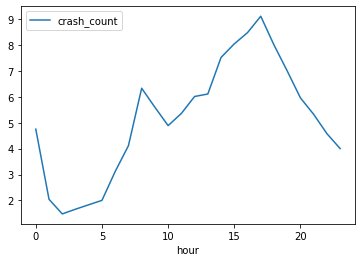

In [156]:
# you only need this one once – all plots from here on will be embedded in the notebook
%matplotlib inline 

mean_hourly_accidents = hourly_accidents.groupby(['hour']).mean()
mean_hourly_accidents.plot(y='crash_count')

# 🏋 Exercise

**Which month of the year has the [highest number](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html) of accidents?**

In [157]:
# your code here...



### Boolean indexing

With [boolean indexing](https://www.geeksforgeeks.org/boolean-indexing-in-pandas/), we can select rows where certain criterea (or combinations thereof) are true. As an example, let's select all accidents where cyclists have been injured:

In [158]:
# it returns for each row whether the criterion is valid 
accidents['number_of_cyclist_injured'] > 0

date_time
2019-01-28 08:07:00    False
2019-01-28 15:57:00    False
2019-01-28 19:00:00    False
2019-01-28 06:45:00    False
2019-01-28 17:48:00    False
                       ...  
2018-12-09 23:27:00    False
2018-12-08 11:40:00    False
2018-12-07 00:07:00    False
2018-12-07 03:10:00    False
2018-12-06 10:45:00    False
Name: number_of_cyclist_injured, Length: 48836, dtype: bool

Filter the dataframe using this boolean series:

In [159]:
# it returns the outcome after applying the criterion

accidents[accidents['number_of_cyclist_injured'] > 0]

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-24 18:38:00,0101000020E610000038328FFCC17C52C0B8921D1B8164...,1,2457163,3 AVENUE,NaN,2019-01-24 18:38:00+00,40.785190,-73.949340,Manhattan,10128.0,...,1,0,0,0,0,0,1,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,"Bike,Station Wagon/Sport Utility Vehicle"
2019-01-28 18:30:00,0101000020E6100000E84EB0FF3A7F52C0A3923A014D60...,1,2456731,NaN,130 WEST 37 STREET,2019-01-28 18:30:00+00,40.752350,-73.987976,Manhattan,10018.0,...,1,0,0,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Taxi,Bike"
2019-01-28 13:10:00,0101000020E6100000B8AF03E78C7A52C05CAFE9414169...,1,2457054,EAST 158 STREET,NaN,2019-01-28 13:10:00+00,40.822304,-73.914850,Bronx,10451.0,...,1,0,0,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Bike"
2019-01-26 14:17:00,0101000020E61000005E9D6340F67C52C01FBFB7E9CF66...,1,2457135,WEST 116 STREET,NaN,2019-01-26 14:17:00+00,40.803220,-73.952530,Manhattan,NaN,...,1,0,0,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Bike"
2018-03-02 00:02:00,NaN,1,2243433,NaN,NaN,2018-03-02 00:02:00+00,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,"Alcohol Involvement,Unspecified","BICYCLE,PASSENGER VEHICLE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-27 13:40:00,0101000020E6100000E6577380607F52C042EC4CA1F360...,1,2441790,NaN,303 WEST 42 STREET,2018-11-27 13:40:00+00,40.757435,-73.990265,Manhattan,10036.0,...,1,0,0,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified,Uns...","Tractor Truck Diesel,Bike,Bus"
2018-11-21 21:50:00,0101000020E610000074D2FBC6D77C52C07009C03FA55A...,1,2444870,UNION AVENUE,NaN,2018-11-21 21:50:00+00,40.708168,-73.950670,Brooklyn,11206.0,...,1,0,0,0,0,0,1,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,"Sedan,Bike"
2018-11-21 08:37:00,0101000020E6100000EEEBC039237652C0C8258E3C1057...,1,2445010,93 STREET,NaN,2018-11-21 08:37:00+00,40.680183,-73.845900,Queens,11417.0,...,1,0,0,0,0,0,1,0,"Traffic Control Disregarded,Unspecified","Sedan,Bike"


Combine multiple citeria:

In [160]:
accidents[(accidents['number_of_cyclist_injured'] > 0) | (accidents['number_of_cyclist_killed'] > 0)]

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-24 18:38:00,0101000020E610000038328FFCC17C52C0B8921D1B8164...,1,2457163,3 AVENUE,NaN,2019-01-24 18:38:00+00,40.785190,-73.949340,Manhattan,10128.0,...,1,0,0,0,0,0,1,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,"Bike,Station Wagon/Sport Utility Vehicle"
2019-01-28 18:30:00,0101000020E6100000E84EB0FF3A7F52C0A3923A014D60...,1,2456731,NaN,130 WEST 37 STREET,2019-01-28 18:30:00+00,40.752350,-73.987976,Manhattan,10018.0,...,1,0,0,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Taxi,Bike"
2019-01-28 13:10:00,0101000020E6100000B8AF03E78C7A52C05CAFE9414169...,1,2457054,EAST 158 STREET,NaN,2019-01-28 13:10:00+00,40.822304,-73.914850,Bronx,10451.0,...,1,0,0,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Bike"
2019-01-26 14:17:00,0101000020E61000005E9D6340F67C52C01FBFB7E9CF66...,1,2457135,WEST 116 STREET,NaN,2019-01-26 14:17:00+00,40.803220,-73.952530,Manhattan,NaN,...,1,0,0,0,0,0,1,0,"Unspecified,Unspecified","Sedan,Bike"
2018-03-02 00:02:00,NaN,1,2243433,NaN,NaN,2018-03-02 00:02:00+00,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,"Alcohol Involvement,Unspecified","BICYCLE,PASSENGER VEHICLE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-27 13:40:00,0101000020E6100000E6577380607F52C042EC4CA1F360...,1,2441790,NaN,303 WEST 42 STREET,2018-11-27 13:40:00+00,40.757435,-73.990265,Manhattan,10036.0,...,1,0,0,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified,Uns...","Tractor Truck Diesel,Bike,Bus"
2018-11-21 21:50:00,0101000020E610000074D2FBC6D77C52C07009C03FA55A...,1,2444870,UNION AVENUE,NaN,2018-11-21 21:50:00+00,40.708168,-73.950670,Brooklyn,11206.0,...,1,0,0,0,0,0,1,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,"Sedan,Bike"
2018-11-21 08:37:00,0101000020E6100000EEEBC039237652C0C8258E3C1057...,1,2445010,93 STREET,NaN,2018-11-21 08:37:00+00,40.680183,-73.845900,Queens,11417.0,...,1,0,0,0,0,0,1,0,"Traffic Control Disregarded,Unspecified","Sedan,Bike"


Note: The operators are: ``|`` for OR, ``&`` for AND, and ``~`` for NOT. 

In [161]:
accidents[ ~ (accidents['number_of_cyclist_injured'] > 0)]

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-28 08:07:00,NaN,1,2456713,CLINTON B FRISK,NaN,2019-01-28 08:07:00+00,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Station Wagon/Sport Utility Vehicle
2019-01-28 15:57:00,NaN,1,2456758,HILLSIDE AVENUE,NaN,2019-01-28 15:57:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2019-01-28 19:00:00,0101000020E6100000E9D495CFF27652C0ABE7A4F78D5B...,1,2456770,YELLOWSTONE BOULEVARD,NaN,2019-01-28 19:00:00+00,40.715270,-73.858570,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Station Wagon/Sport Utility Vehicle,Sedan"
2019-01-28 06:45:00,NaN,1,2456794,GUY R BREWER BOULEVARD,NaN,2019-01-28 06:45:00+00,NaN,NaN,NaN,11434.0,...,0,0,1,0,0,0,1,0,"Failure to Yield Right-of-Way,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2019-01-28 17:48:00,0101000020E610000078D15790667452C0ACE3F8A1D264...,1,2456795,147 STREET,NaN,2019-01-28 17:48:00+00,40.787678,-73.818760,Queens,NaN,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-09 23:27:00,0101000020E61000006EC0E787118A52C07500C45DBD4E...,1,2454700,STATEN ISLAND EXPRESSWAY,NaN,2018-12-09 23:27:00+00,40.615154,-74.157320,Staten Island,NaN,...,0,0,15,0,0,0,15,0,"Unsafe Speed,Unspecified,Unspecified,Unspecified","Fire,Sedan,Station Wagon/Sport Utility Vehicle..."
2018-12-08 11:40:00,0101000020E610000054E3A59BC47652C090F7AA95095B...,1,2455580,METROPOLITAN AVENUE,NaN,2018-12-08 11:40:00+00,40.711230,-73.855750,Queens,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified,Unspecified","Station Wagon/Sport Utility Vehicle,Station Wa..."
2018-12-07 00:07:00,0101000020E610000044A7E7DD588052C08E0244C18C5B...,1,2455630,BROADWAY,NaN,2018-12-07 00:07:00+00,40.715233,-74.005424,Manhattan,10278.0,...,0,0,4,0,0,0,4,0,"Driver Inattention/Distraction,Driver Inattent...","Taxi,Taxi,Taxi"


Let's query using string matching:

In [163]:
accidents[accidents['vehicle_types'].str.contains('Taxi')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

Ooops... Do we have null values in our ```vehicle_types``` column?

In [164]:
accidents[accidents['vehicle_types'].isnull()]

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-24 07:00:00,0101000020E610000063B9A5D5907252C0E2AFC91AF558...,1,2457167,BREWER BOULEVARD,NaN,2019-01-24 07:00:00+00,40.694980,-73.790090,Queens,11433.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,NaN
2018-11-16 05:30:00,0101000020E61000009E29745E637552C0261E5036E556...,1,2407061,ROCKAWAY BOULEVARD,NaN,2018-11-16 05:30:00+00,40.678870,-73.834190,Queens,11417.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,NaN
2018-11-09 17:30:00,0101000020E610000037894160E57152C0D3122BA39155...,1,2410596,155 STREET,NaN,2018-11-09 17:30:00+00,40.668507,-73.779625,Queens,NaN,...,0,0,0,0,1,0,1,0,NaN,NaN
2019-01-28 15:20:00,0101000020E6100000B7B41A12F78452C072512D228A51...,1,2457065,NaN,52 VANDUZER STREET,2019-01-28 15:20:00+00,40.637028,-74.077580,Staten Island,10301.0,...,0,0,0,0,1,0,1,0,NaN,NaN
2019-01-28 10:50:00,0101000020E61000001CCEFC6A0E7652C03F524486556C...,1,2456906,EASTCHESTER ROAD,NaN,2019-01-28 10:50:00+00,40.846360,-73.844630,Bronx,10461.0,...,0,0,0,0,1,0,1,0,Unspecified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-09 20:19:00,0101000020E610000092CB7F48BF7952C0045ABA826D6E...,1,2422938,WEST FORDHAM ROAD,NaN,2019-01-09 20:19:00+00,40.862717,-73.902300,Bronx,NaN,...,0,0,0,0,1,0,1,0,Aggressive Driving/Road Rage,NaN
2018-11-22 19:37:00,0101000020E6100000639CBF09857852C0C616821C946C...,1,2444578,EAST 182 STREET,NaN,2018-11-22 19:37:00+00,40.848270,-73.883120,Bronx,10472.0,...,0,0,0,0,1,0,1,0,Failure to Yield Right-of-Way,NaN
2018-12-14 20:15:00,0101000020E6100000A453573ECB7B52C0A9FB00A43657...,1,2451489,NaN,225 DECATUR STREET,2018-12-14 20:15:00+00,40.681355,-73.934280,Brooklyn,11233.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,NaN


Let's replace the NaN values with an empty string:

In [165]:
accidents.vehicle_types.fillna('', inplace=True)
accidents[accidents['vehicle_types'].isnull()]

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,


Now this should work:

In [166]:
accidents[accidents['vehicle_types'].str.contains('Taxi')]

,the_geom,crash_count,cartodb_id,on_street_name,cross_street_name,date_time,latitude,longitude,borough,zip_code,...,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed,contributing_factors,vehicle_types
date_time,,,,,,,,,,,,,,,,,,,,,
2019-01-28 10:00:00,0101000020E610000021C84109338152C0C4B5DAC35E52...,1,2456884,GOWANUS EXPY (BQE),NaN,2019-01-28 10:00:00+00,40.643517,-74.018740,Brooklyn,NaN,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified,Unspecified","Flat Bed,Taxi,Station Wagon/Sport Utility Vehicle"
2019-01-28 14:27:00,0101000020E6100000AED3484BE57B52C0508E0244C156...,1,2456886,ATLANTIC AVENUE,NaN,2019-01-28 14:27:00+00,40.677773,-73.935870,Brooklyn,11213.0,...,0,0,2,0,0,0,2,0,"Driver Inattention/Distraction,Driver Inattent...","Sedan,Taxi"
2019-01-28 16:20:00,NaN,1,2456986,BROOKLYN QUEENS EXPRESSWAY,NaN,2019-01-28 16:20:00+00,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,Backing Unsafely,Taxi
2019-01-28 14:04:00,NaN,1,2457011,OCEAN PARKWAY,NaN,2019-01-28 14:04:00+00,NaN,NaN,NaN,11218.0,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Unspecified","Taxi,Station Wagon/Sport Utility Vehicle"
2019-01-15 08:52:00,0101000020E610000051A04FE4497E52C01B81785DBF56...,1,2419126,PARK PLACE,NaN,2019-01-15 08:52:00+00,40.677715,-73.973260,Brooklyn,11217.0,...,0,0,0,0,1,0,1,0,Driver Inattention/Distraction,Taxi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-17 20:00:00,0101000020E6100000D7D9907F667852C014ED2AA4FC70...,1,2435330,EAST GUN HILL ROAD,NaN,2018-12-17 20:00:00+00,40.882710,-73.881256,Bronx,10467.0,...,0,0,1,0,0,0,1,0,"Following Too Closely,Unspecified","Taxi,Station Wagon/Sport Utility Vehicle"
2018-12-05 23:26:00,0101000020E6100000B1506B9A777E52C0DA39CD02ED60...,1,2436810,EAST 49 STREET,NaN,2018-12-05 23:26:00+00,40.757233,-73.976050,Manhattan,NaN,...,0,0,1,0,0,0,1,0,"Driver Inattention/Distraction,Driver Inattent...","Taxi,Sedan"
2018-11-05 21:20:00,0101000020E6100000DE3CD521377C52C0D9CD8C7E3468...,1,2449630,LENOX AVENUE,NaN,2018-11-05 21:20:00+00,40.814102,-73.940865,Manhattan,10037.0,...,0,0,0,0,1,0,1,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Taxi


Writing the filtered dataset to a CSV file:

In [167]:
taxi_accidents = accidents[accidents['vehicle_types'].str.contains('Taxi')]
taxi_accidents.to_csv('taxi_accidents.csv')

### Plotting and (simple) mapping

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

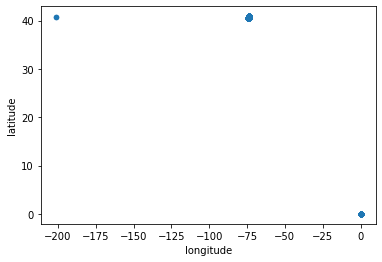

In [168]:
accidents.plot(x='longitude', 
               y='latitude', 
               kind='scatter')

These accidents are all in NYC, so the dots at the top left and bottom right are clearly wrong coordinates. Let's remove them:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

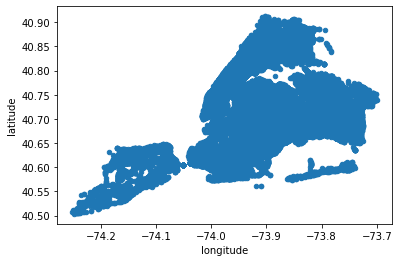

In [169]:
accidents = accidents[ (accidents['latitude'] > 30) & (accidents['longitude'] > -100)  ]
accidents.plot.scatter(x='longitude', 
               y='latitude')

Not very pretty, but it's a start. 

Let's make a fancy map now. See the docs for explanation of the [variables](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) and [color scales](https://matplotlib.org/users/colormaps.html).

<AxesSubplot:title={'center':'NYC accidents with injuries'}, xlabel='longitude', ylabel='latitude'>

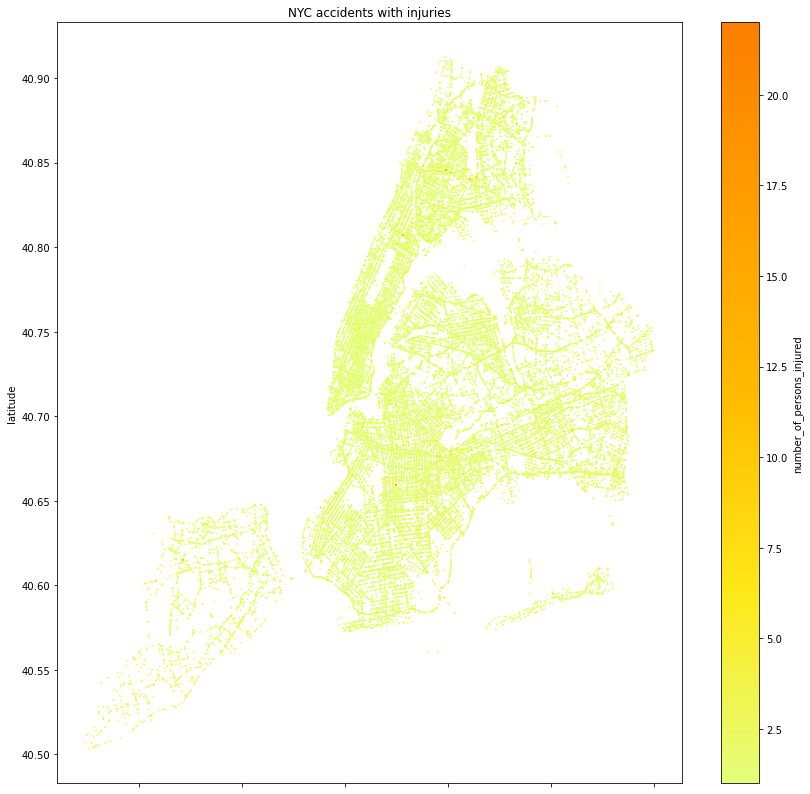

In [170]:
accidents[accidents['number_of_persons_injured'] > 0].plot.scatter(x='longitude', 
               y='latitude', 
               c='number_of_persons_injured',
               s=0.7,
               title='NYC accidents with injuries',                                                   
               colormap='Wistia',
               figsize=[14,14])

In [171]:
help(accidents.plot.scatter)

Help on method scatter in module pandas.plotting._core:

scatter(x, y, s=None, c=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : str, scalar or array-like, optional
        The size of each point. Possible values are:
    
       

Let's take a look at hexbins to identify potential hotspots:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

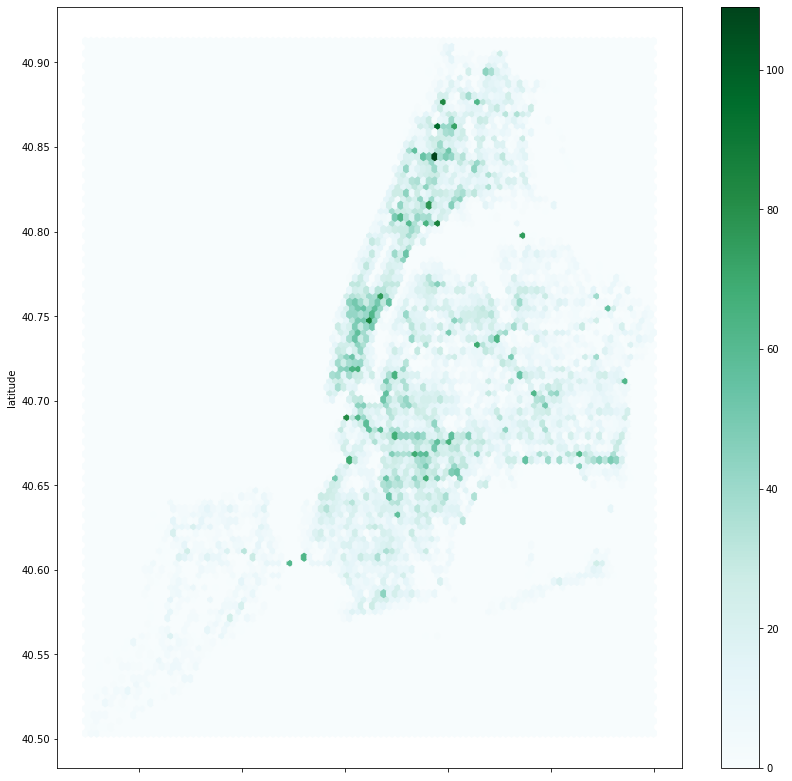

In [172]:
accidents.plot.hexbin(x='longitude', 
               y='latitude',
               figsize=[14,14])

Let's make a KDE map using [Seaborn](https://seaborn.pydata.org). If you don't know what KDE is, here is an excellent interactive tutortial explaning the idea of [Kernel Density Estimation](https://mathisonian.github.io/kde/).

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# in case we have duplicate columns, which was the case, as we duplicated the 'Date_time' column
#accidents = accidents.reset_index(drop=True)

/Users/jamal/opt/anaconda3/envs/GC/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: cannot reindex from a duplicate axis

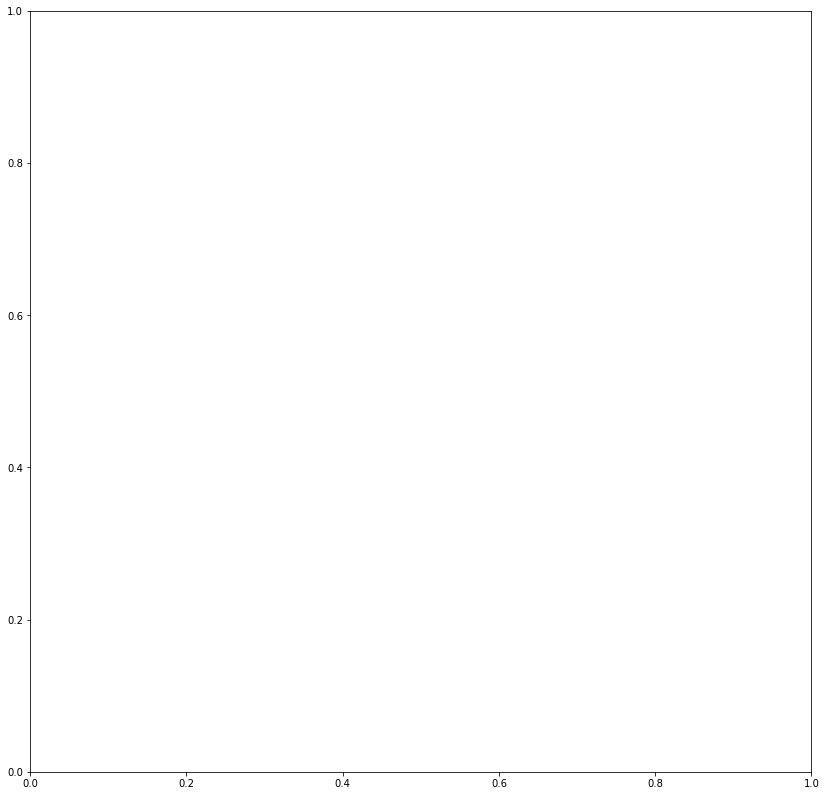

In [175]:
plt.figure(figsize=(14, 14))


sns.kdeplot(accidents['longitude'], 
            accidents['latitude'],
            cmap='Reds',
            shade=True)
plt.savefig('kde.pdf') # saves the plot to a PDF file in the same folder as this notebook 
                       # – this command has to go in the same cell that produces the plot!

Let's get an overview of the accidents dataset:

In [176]:
accidents.describe()

,crash_count,cartodb_id,latitude,longitude,zip_code,socrata_id,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,number_of_pedestrian_injured,number_of_pedestrian_killed,number_of_persons_injured,number_of_persons_killed
count,45373.0,4.537300e+04,45373.000000,45373.000000,29361.000000,4.537300e+04,45373.000000,45373.000000,45373.000000,45373.000000,45373.000000,45373.000000,45373.000000,45373.000000
mean,1.0,2.368911e+06,40.721679,-73.913728,10917.756412,3.980368e+06,0.102087,0.000309,0.999295,0.001962,0.249267,0.002733,1.351398,0.005003
std,0.0,7.107838e+04,0.080958,0.086719,521.438019,7.227312e+04,0.305448,0.017563,1.065227,0.045231,0.456973,0.053044,0.838750,0.071794
min,1.0,2.243390e+06,40.503387,-74.252180,10000.000000,3.854152e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.307839e+06,40.665134,-73.964226,10457.000000,3.918610e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,2.369558e+06,40.713290,-73.919060,11211.000000,3.978307e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,2.429664e+06,40.770670,-73.859610,11355.000000,4.044885e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,2.497698e+06,40.912468,-73.700584,11697.000000,4.112205e+06,2.000000,1.000000,21.000000,2.000000,6.000000,2.000000,22.000000,2.000000


How does the distribution of monthly fatalities look like?

/Users/jamal/opt/anaconda3/envs/GC/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='number_of_persons_killed'>

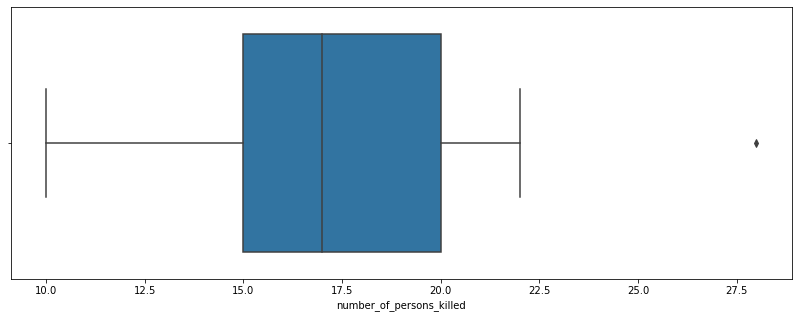

In [200]:
monthly_accidents = accidents.resample('M').sum()

plt.figure(figsize=(14, 5))
sns.boxplot(monthly_accidents['number_of_persons_killed'])



🤔 How do you [read a box plot again](https://en.wikipedia.org/wiki/Box_plot#Visualization)? 

Let's make a distribution plot:

/Users/jamal/opt/anaconda3/envs/GC/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_persons_killed', ylabel='Density'>

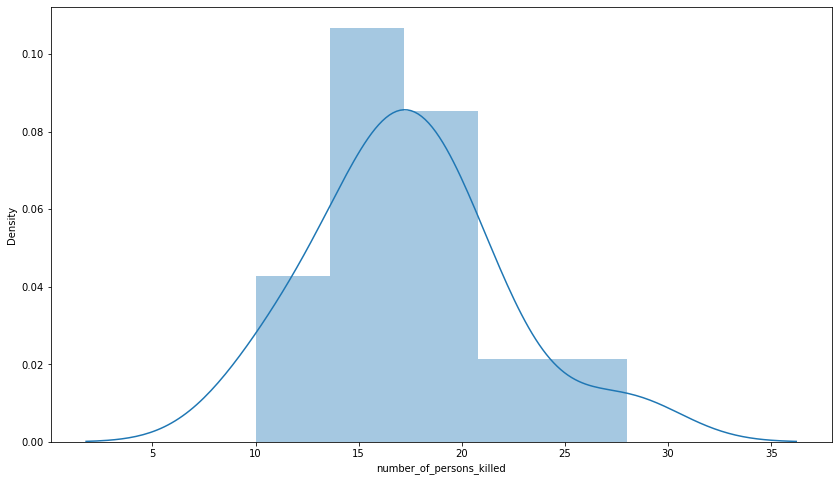

In [187]:
plt.figure(figsize=(14, 8))
sns.distplot(monthly_accidents['number_of_persons_killed'], kde=True)



Scatter plot with fitted linear regression line:

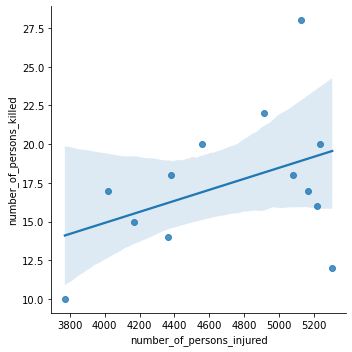

In [197]:
sns.lmplot(x='number_of_persons_injured',y='number_of_persons_killed',data=monthly_accidents)

In [ ]:
monthly_accidents = accidents.resample('M').sum()
monthly_accidents['month'] = monthly_accidents.index.month
monthly_accidents.max()

%matplotlib inline 

monthly_accidents.plot(y='crash_count')

In [ ]:
#monthly_accidents['month'] = monthly_accidents.index.month
#monthly_accidents.groupby(['month']).max()
#accidents.groupby(['Month']).sum().max()
#accidents.groupby(['Month']).max()

